## ANLY 580 Project 2


## Group Name: InsightX

Group member: Qian Yi, Jingyu Zhang, Beixuan Jia, Zhenkun Wang

Directed By Professor Marck Vaisman

### Motivation of this project

Nowadays, E-commerce has become one of the most important marketing channels of commercial brands. According to a Constant Contact website survey, 90% of the customers’ decisions are influenced by online reviews (Pinkham, Ryan, and Ryan Pinkham). Thus, the ratings and recommendation levels play important roles in online sales. This project will focus on the following questions: 
 
 (1) How could one predict whether a product will be recommended by other customers using sentiment analysis? 
 
 (2) Assume that longer text reviews contain more sentiment words (e.g. more instense compliments or complaints), could star ratings be predicted? 

These questions are worth asking because the recommendation levels and star ratings directly reflect the performance of goods, which also related to the future selling of products. If recommendation data and star ratings could be precisely predicted, the commercial brands could make better marketing strategies based on current product performance. 


### Literature Review

In the past, many researchers have done some research about Natural Language Processing and its
applications. One of the most important applications is using sentimental analysis (also called
opinion mining) to classify it is a positive review, negative review, or maybe neutral. For example,
in 2016, the research article “Sentiment Analysis for Online Product Reviews using NLP
Techniques and Statistical Methods” showed how the Naive Bayes classification model and
Hidden Markov Models are applied to analyze the polarity of the sentiment on online product
reviews due to its computational simplicity and stochastic robustness (Muthukumaran, Suresh). 

Past work has also indicated that online reviews are important for both retailers and customers.
Customers want to find the features of the product (e.g. quality, after sale service) and retailers also
want to know the feedback from customers (e.g. any complaints, any good aspect that should keep).
NLP is used to generating product feature by using topic modeling techniques (Joshi, Prateek)
There’s some online journal introducing how to find topics from text (Dwivedi).

Additionally, some research focused on analyzing the helpfulness of online reviews. In Malik
and Hussain’s work, they showed that characteristics of the reviewers and the review category
features would have great impacts on predicting the helpfulness of an online review. Reviews that
have many comments, large values of sentiment and polarity scores are possible to gain more
helpful votes. The reviewer activity length, reviewer recency, the number of questions answered,
the ratio of positive reviews and the average rating per review are all statistically significant
predictors for helpfulness prediction. Ngo-ye and Shina also studied the same problem using the
Regressional ReliefF-enhanced text mining method.

Besides, there is a research about using POS to detect fake reviews conducted by Stanford
University. In this study, different model such as logistic regression, svm, neural networks are used
to distinguish the fake review, which would make the reviews of this dataset more accurate and
efficient.


### Data Overview

This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and consists of the variables: Clothing ID, Age, Title, Rating, Recommended IND, etc. There are two label variables: Rating and Recommended IND. Rating is a positive ordinal Integer variable for the product score granted by the customer from 1 (worst) to 5 (best). Recommended IND is a binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended. Therefore, by splitting the training dataset and testing dataset, NLP techniques can be used to do sentiment analysis based on the reviews and give a rating score. Additionally, NLP techniques can be applied to predict whether this customer will recommend this product to others based on the review.


### Data Cleaning and Preparation

Import related packages. 

In [1]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.util import ngrams
import pandas as pd
import nltk
import matplotlib.pyplot as plt

Read the dataset, grap useful columns, remove missing values and reindex for the new dataset. 

In [2]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df1=pd.DataFrame()
df1['id']=df['id']
df1['Rating']=df["Rating"]
df1['Recommended']=df["Recommended IND"]
df1['Text']=df["Review Text"]
#remove missing value 
df1=df1.dropna()
# reindex and drop the original index 
df1=df1.reset_index(drop=True)

In the dataset, each row may contain several paragraphs of review text. We need to remove all the spaces between paragraphs.

In [3]:
# create a new list to store all the review text   
b=[]
# write a function to remove all the spaces between paragraph 
# and combine all text into one paragraph 
def myfunction(i):
    a=df1['Text'][i]
    a=re.sub(r'[\n]+', ' ',a)
    a=re.sub(r'[\t]+', ' ',a)
    a=re.sub(r'[\r]+', ' ',a)
    b.append(a)
    
for i in range(0, 22641):
    myfunction(i)



Create a new dataset with one-paragraph text and save the new dataset into txt file. This step just saved the dataset without miltiple paragraph reviews.

In [4]:
# create a new dataset with "one-paragraph" text 
data = {'Text': b}
df2=pd.DataFrame(data)
df1['Text']=df2['Text']
    
# save the dataset in txt file 
df1.to_csv('Not_Cleaned.txt', sep='\t', index=False, header=False)

Write a function to append each variable in the dataset;
Clean the tweets by removing punctuations, numbers, URL, stopwords

In [5]:
def texts_clean(filename):
    lst = []
    with open(filename, 'r', encoding = "utf8") as file:
        for line in file:
            lst.append(line)
    
    id_lst = []
    rating_lst = []
    recommend_lst = []
    texts_lst = []

    for i in range(len(lst)):
        id_lst.append(lst[i].split('\t')[0])
        rating_lst.append(lst[i].split('\t')[1])
        recommend_lst.append(lst[i].split('\t')[2])
        texts_lst.append(lst[i].split('\t')[3])

    data_lst = {'id': id_lst, 
                'rating': rating_lst,
                'recommend': recommend_lst,
                'texts': texts_lst}
    
    df_lst = pd.DataFrame(data_lst)
   ### Clean the tweets by removing punctuations, numbers, URL, stopwords
    clean_texts = []
    words = set(nltk.corpus.words.words())
    stop_words = set(stopwords.words('english'))

    for text in df_lst["texts"]:
    
        text = " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text).split()) 
        text = text.replace('#', ' ').replace('@', ' ') 

        text = " ".join(w.lower() for w in nltk.wordpunct_tokenize(text) if w.lower() in words) # remove words not in corpus
        text = " ".join(w.lower() for w in nltk.word_tokenize(text) if not w.lower() in stop_words) # remove stop words
    
        clean_texts.append(text)
    
    df_lst["clean_texts"] = clean_texts
    df_lst = df_lst.drop(columns="texts")
    return df_lst



Print the cleaned data set

In [6]:
df_clean=texts_clean("Not_Cleaned.txt")
print(df_clean)

          id rating recommend  \
0          0      4         1   
1          1      5         1   
2          2      3         0   
3          3      5         1   
4          4      5         1   
5          5      2         0   
6          6      5         1   
7          7      4         1   
8          8      5         1   
9          9      5         1   
10        10      3         0   
11        11      5         1   
12        12      5         1   
13        13      5         1   
14        14      3         1   
15        15      4         1   
16        16      3         1   
17        17      5         1   
18        18      5         1   
19        19      5         1   
20        20      4         1   
21        21      4         1   
22        22      2         0   
23        23      3         1   
24        24      5         1   
25        25      3         0   
26        26      2         0   
27        27      4         1   
28        28      5         1   
29        

Save the cleaned dataset into txt and csv:

In [7]:
# save the cleaned dataset into txt and csv 
df_clean.to_csv("Cleaned.txt")    
df_clean.to_csv("Cleaned.csv")

### Exploratory Data Analysis Part

Drop irrelevant variables

In [8]:
df.head()
df_nw = df.drop(['id','Clothing ID','Title', 'Review Text'], 1)
df_nw.head()
cols = df_nw.columns

Check each columns' data type and counts of unique values

In [9]:
def uni_cnt(x):
    print(df_nw[x].value_counts(), "\n")

for x in cols:
    uni_cnt(x) 

39    1269
35     909
36     842
34     804
38     780
37     766
41     741
33     725
46     713
42     651
32     631
48     626
44     617
40     617
43     579
31     569
47     564
53     560
45     529
29     513
49     490
56     471
52     442
28     428
26     423
30     407
50     398
54     395
51     393
57     363
      ... 
69     113
20     108
21     102
70      93
71      51
74      50
72      46
83      43
73      40
19      40
75      26
77      18
79      15
78      15
82      13
76      10
80      10
85       6
84       6
89       5
91       5
81       5
18       4
87       4
94       3
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64 

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64 

1    19314
0     4172
Name: Recommended IND, dtype: int64 

0      11176
1       4043
2       2193
3       1433
4        922
5        673
6        525
7        374
8        319
9        261
10       225
11  

#### Boxplot: Distribution of Age

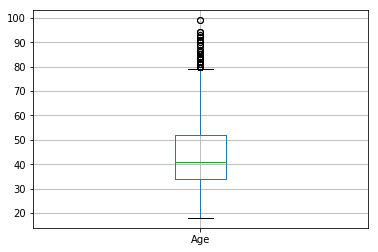

In [10]:
boxplot = df.boxplot(column=['Age'])

The boxplot shows that the average age of all reviews are approximately 40.
Most reviewers' ages are between 35 and 52 -- Middle Ages.

#### Pie Chart: Distribution of Ratings

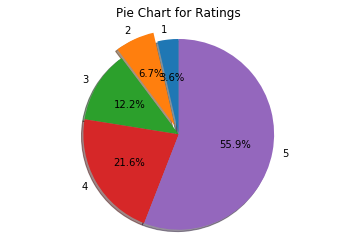

In [11]:
labels = '1', '2', '3', '4', '5'
sizes = [842, 1565, 2871, 5077, 13131]
explode = (0, 0.1, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for Ratings')
plt.show()

The pie chart shows that more than 75% of the reviewers give ratings 4 or higher.
Only around 10.3% of the reviewers leave negative comments (ratings of 1 or 2).

#### Ratings by Each Department

Int64Index([5, 4, 3, 2, 1], dtype='int64')
5    1033
4     371
3     178
2      90
1      63
Name: Rating, dtype: int64


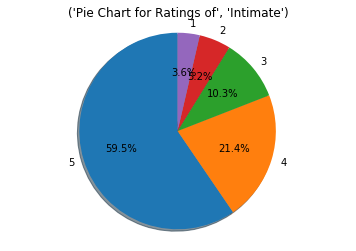

<Figure size 640x480 with 0 Axes>

Int64Index([5, 4, 3, 2, 1], dtype='int64')
5    3397
4    1395
3     838
2     461
1     228
Name: Rating, dtype: int64


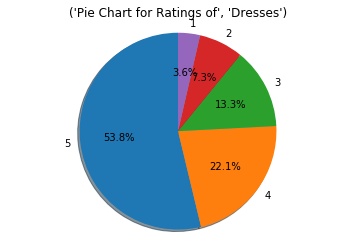

<Figure size 640x480 with 0 Axes>

Int64Index([5, 4, 3, 2, 1], dtype='int64')
5    2273
4     785
3     421
2     205
1     115
Name: Rating, dtype: int64


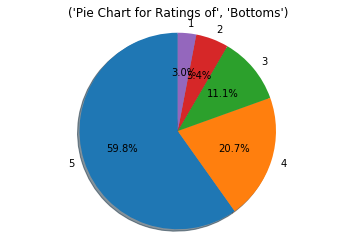

<Figure size 640x480 with 0 Axes>

Int64Index([5, 4, 3, 2, 1], dtype='int64')
5    5731
4    2299
3    1324
2     738
1     376
Name: Rating, dtype: int64


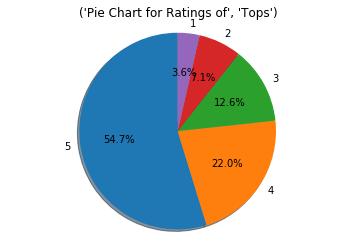

<Figure size 640x480 with 0 Axes>

Int64Index([5, 4, 3, 2, 1], dtype='int64')
5    631
4    201
3     91
2     60
1     49
Name: Rating, dtype: int64


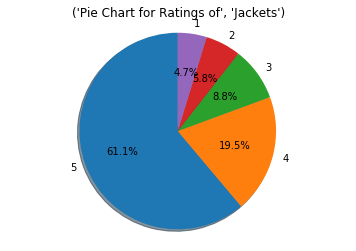

<Figure size 640x480 with 0 Axes>

Int64Index([5, 4, 3, 2, 1], dtype='int64')
5    52
4    26
3    19
2    11
1    11
Name: Rating, dtype: int64


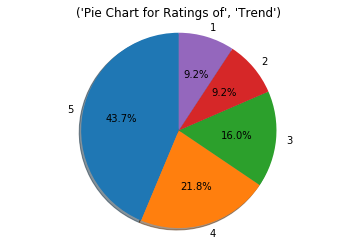

<Figure size 640x480 with 0 Axes>

Int64Index([], dtype='int64')
Series([], Name: Rating, dtype: int64)


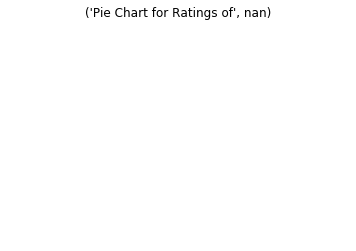

<Figure size 640x480 with 0 Axes>

In [12]:
from matplotlib.pyplot import figure

def rat_dis(dep):
    dis = df[df["Department Name"] == dep]
    table = dis['Rating'].value_counts()

    labels = table.index
    sizes = table[:]
    print(labels)
    print(sizes)
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    title = 'Pie Chart for Ratings of', dep
    plt.title(title)
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.show()
    
    
for dep in df["Department Name"].unique():
    rat_dis(dep)        


The pie charts show that the Jackets department received most "5 stars" and Trend received the least. Most departments have very similar distributions of ratings; however, Trends seems to have more bad reviews than other departments. It shows that the company should porbably pay close attention to Trends department than the other ones.

#### The Exploration of Positive Feedback Counts (PFC)

Positive Feedback Counts (PFC) is a measurement of the amount of reviewers who found one specific comment helpful. 
Studying the underlying pattern of PFC would help business owners better understand the needs of customers.


##### We have 2 initial hypothesis regarding PFC:


1. PFC is related to the count of words 
(i.e. Reviews with more words tend to have higher PFCs)


2. PFC is related to the ratings (i.e. Reviews with more extreme opinions (1 or 5 stars) tend to have higher PFCs)

Sort the dataset by PFC

In [13]:
sort_by_fb = df.sort_values('Positive Feedback Count', ascending=False)
sort_by_fb = sort_by_fb[sort_by_fb['Positive Feedback Count'] > 10]  
#print(sort_by_fb)
#print(sort_by_fb["Positive Feedback Count"])
sort_by_fb = sort_by_fb.reset_index(drop=True)
sort_by_fb.head()

,id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,7218,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,General,Dresses,Dresses
1,1294,1095,29,NaN,I've been on the hunt for the perfect dress to...,5,1,117,General,Dresses,Dresses
2,7765,986,43,Quality does not merit cost,"I generally don't write bad reviews, but there...",1,0,108,General,Jackets,Jackets
3,19094,1121,35,A navy trench-yes!,I am a big fan of trench coats and i love that...,5,1,99,General,Jackets,Outerwear
4,13210,1078,23,"Super flattering, beautiful dress",This is my favorite dress i've bought in the p...,5,1,98,General,Dresses,Dresses


Print the length of each review in the new dataset sorted by PFC

In [14]:
length = []
for i in range(0, len(sort_by_fb)):
    words = len(sort_by_fb["Review Text"][i].split())
    length.append(words)

print(length)

[97, 95, 84, 91, 57, 90, 65, 100, 100, 98, 100, 93, 98, 87, 100, 95, 98, 87, 103, 91, 90, 73, 24, 103, 99, 99, 95, 97, 66, 92, 47, 101, 40, 97, 104, 101, 99, 91, 98, 99, 90, 98, 100, 98, 101, 68, 91, 67, 55, 52, 100, 100, 96, 67, 47, 78, 97, 89, 102, 46, 90, 70, 94, 95, 96, 45, 105, 94, 41, 93, 100, 59, 56, 90, 30, 97, 77, 100, 90, 72, 55, 102, 79, 30, 96, 105, 104, 100, 74, 89, 64, 101, 21, 75, 64, 96, 103, 89, 98, 100, 96, 100, 71, 18, 29, 88, 65, 100, 75, 87, 104, 66, 94, 32, 91, 94, 72, 87, 73, 61, 94, 98, 97, 55, 66, 97, 25, 92, 26, 97, 95, 95, 87, 71, 106, 102, 89, 56, 107, 14, 84, 58, 61, 97, 97, 96, 35, 99, 43, 92, 97, 94, 61, 87, 87, 63, 99, 86, 62, 104, 95, 101, 64, 90, 30, 82, 44, 98, 50, 85, 96, 52, 96, 95, 101, 98, 83, 87, 38, 42, 98, 97, 100, 75, 26, 83, 48, 55, 87, 71, 88, 81, 85, 98, 96, 89, 95, 79, 58, 84, 98, 87, 97, 102, 24, 32, 75, 31, 35, 46, 54, 44, 45, 95, 56, 30, 103, 88, 77, 88, 93, 75, 30, 96, 84, 101, 93, 39, 88, 49, 67, 53, 95, 94, 49, 61, 90, 90, 77, 105, 1

From the output, we can already tell that one's PFC is not necessarily related to the length of a review, since some reviews with the highest PFC are actually more concise than others.

Add one new column "length" to the dataframe to better show our founding

In [15]:
sort_by_fb['length'] = length
sort_by_fb.head()

,id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length
0,7218,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,General,Dresses,Dresses,97
1,1294,1095,29,NaN,I've been on the hunt for the perfect dress to...,5,1,117,General,Dresses,Dresses,95
2,7765,986,43,Quality does not merit cost,"I generally don't write bad reviews, but there...",1,0,108,General,Jackets,Jackets,84
3,19094,1121,35,A navy trench-yes!,I am a big fan of trench coats and i love that...,5,1,99,General,Jackets,Outerwear,91
4,13210,1078,23,"Super flattering, beautiful dress",This is my favorite dress i've bought in the p...,5,1,98,General,Dresses,Dresses,57


Create a dataframe to better present the relationship between PFC and length and ratings respectively

In [16]:
compare = sort_by_fb[['Positive Feedback Count', 'length', 'Rating']]
print(compare)

      Positive Feedback Count  length  Rating
0                         122      97       3
1                         117      95       5
2                         108      84       1
3                          99      91       5
4                          98      57       5
5                          95      90       4
6                          94      65       5
7                          93     100       4
8                          89     100       5
9                          87      98       4
10                         84     100       5
11                         82      93       3
12                         81      98       4
13                         81      87       5
14                         81     100       4
15                         81      95       5
16                         78      98       4
17                         77      87       3
18                         71     103       3
19                         69      91       4
20                         68     

From the output, we can tell that the one's PFC is not necessarily related to the ratings of a review, since some reviews with the highest PFC are actually netrual (3 star).

After further investigating the data, we realized that PFC is more related to the content. It means that reviews which are more concise and with more relevant details would usually yield higher PFCs.


### Visulazations Part

#### Draw a graph of word frequency: 

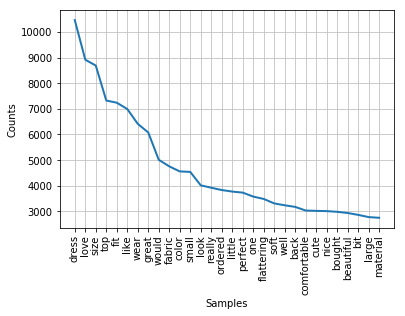

In [17]:
## word frequency  
def graph():
  temp = " ".join(df_clean['clean_texts'])
  tokens = nltk.tokenize.word_tokenize(temp)
  fd = nltk.FreqDist(tokens)
  fd.plot(30,cumulative=False)

graph()

#### Wordcloud 

In [18]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [19]:
df_clean
print("There are {} observations and {} features in this dataset. \n".format(df_clean.shape[0],df_clean.shape[1]))

print("There are {} types of rating score in this dataset such as {}... \n".format(len(df_clean.rating.unique()),
                                                                           ", ".join(df_clean.rating.unique()[0:5])))
rating = df_clean.groupby("rating") 
rating.describe().head()



There are 22641 observations and 4 features in this dataset. 

There are 5 types of rating score in this dataset such as 4, 5, 3, 2, 1... 



id                    recommend                   clean_texts  \
        count unique    top freq     count unique top   freq       count   
rating                                                                     
1         821    821   2852    1       821      2   0    806         821   
2        1549   1549   9839    1      1549      2   0   1455        1549   
3        2823   2823  10029    1      2823      2   0   1653        2823   
4        4908   4908  14858    1      4908      2   1   4744        4908   
5       12540  12540  18543    1     12540      2   1  12517       12540   

                                                                       
       unique                                                top freq  
rating                                                                 
1         821  generally find sizing retailer consistent orde...    1  
2        1548  another franco dress recent sale looking work ...    2  
3        2822  shirt beautiful however thought made lighter m...    2  
4        4907                           wearing medium reference    2  
5       12531                                            perfect    3

(1) word cloud of all the reviews (top 200 words) 

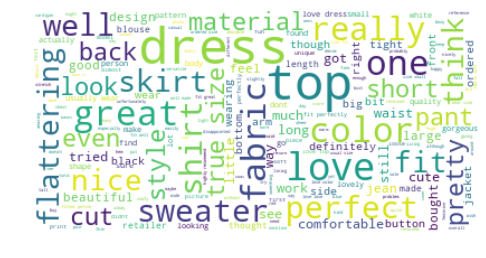

In [20]:
text = df_clean.clean_texts[0]

text = " ".join(review for review in df_clean.clean_texts)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# white  
wordcloud = WordCloud(max_font_size=45, max_words=200, background_color="white").generate(text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")   
plt.savefig('plot.jpg')
plt.show() 

(2) word cloud of reviews comparision between 1-star and 5-star

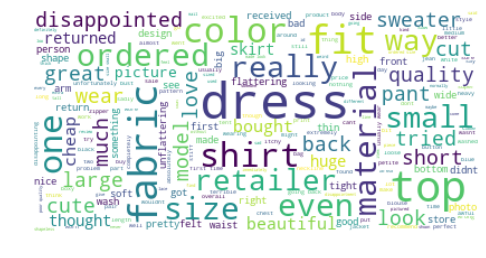

In [21]:
## 1 star 
dfr1=pd.DataFrame()
dfr1=df_clean.loc[df_clean['rating'] == "1"]
dfr1.describe()
rating.describe().head()
#reindex 
dfr1=dfr1.reset_index(drop=True)
text = dfr1.clean_texts[0]
text = " ".join(review for review in dfr1.clean_texts)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=45, max_words=200, background_color="white").generate(text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")   
plt.savefig('1star.jpg')
plt.show() 



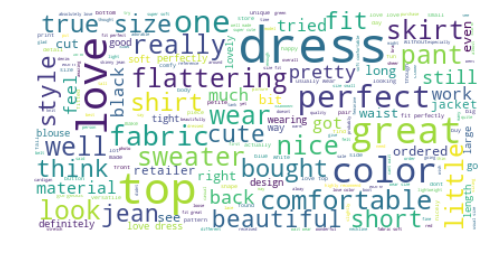

In [22]:
## 5 star 
dfr5=pd.DataFrame()
dfr5=df_clean.loc[df_clean['rating'] == "5"]
dfr5.describe()
rating.describe().head()
#reindex 
dfr5=dfr5.reset_index(drop=True)
text = dfr5.clean_texts[0]
text = " ".join(review for review in dfr5.clean_texts)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=45, max_words=200, background_color="white").generate(text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")   
plt.savefig('5star.jpg')
plt.show() 

According to the wordcloud analysis, we could notice that 1-star reviews have key words like "disappointed", "small", "large", "huge" and "returned", these may reflect the costomers major complains about the products--sizing problems. In application aspect, the merchant could make related strategies focusing on "how to help costomer find the fit sizes". 

For the 5-star reviews, the "dress" is very outstanding from all the words. According to our EDA visulazation in Tableau, dress acctually the most popular products that customers want to leave reviews. In application side, the clothing merchant could make related marketing strategies and promotion to sell dresses since people really interested in it. 

##### Frequecy review count for each category (graph drawn by Tableau)

![](eda1.jpg)

From the graph shown above, we could know that the people are very interested in writing reviews about Dress, Knits and Blouses. Thus, the online selling platform could set strategies foucusing on these 3 categories to boost revenues.  

##### Number of reviews by division and department (graph drawn by Tableau) 

![](eda2.jpg)

### Modeling Section

In [23]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.util import ngrams
import pandas as pd
import nltk
import matplotlib.pyplot as plt


import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import csv
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer



### Modeling: Recommend or Not

##### We are building this model to predict whether this reviewer is going to recommend this product or not based on their reviews. Therefore, we will have two labels: recommend or not recommend.
##### Then we will apply multinomial naive bayes and logistic regression to perform modeling. 

In [24]:
# Read clean data
reviews = pd.read_csv("Cleaned.csv")
print(reviews.head(10))


recommend = reviews[['recommend','clean_texts']]
print(recommend.head(10))

   Unnamed: 0  id  rating  recommend  \
0           0   0       4          1   
1           1   1       5          1   
2           2   2       3          0   
3           3   3       5          1   
4           4   4       5          1   
5           5   5       2          0   
6           6   6       5          1   
7           7   7       4          1   
8           8   8       5          1   
9           9   9       5          1   

                                         clean_texts  
0        absolutely wonderful silky sexy comfortable  
1  love dress pretty find store glad never would ...  
2  high dress really work initially ordered petit...  
3  love love love fun flirty fabulous every time ...  
4  shirt flattering due adjustable front tie perf...  
5  love reese one petite tall usually wear brand ...  
6  basket last see would look like person store p...  
7  ordered carbon store pick ton stuff always try...  
8  love dress usually get little snug bust ordere...  
9  ordere

In [25]:
# Create training set (90%) and testing set (10%)
reviews_train, reviews_test = train_test_split(recommend, test_size = 0.1)
#print(reviews_train.shape)
#print(reviews_test.shape)

X_train = reviews_train['clean_texts'].fillna(' ')
y_train = reviews_train['recommend']

X_test = reviews_train['clean_texts'].fillna(' ')
y_test = reviews_train['recommend']

In [26]:
# Vectorizer words

vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(X_train)
X_train_dtm = vectorizer.transform(X_train)

vectorizer.get_feature_names()
print(vectorizer.vocabulary_)

X_test_dtm = vectorizer.transform(X_test)
X_test_dtm



{'ordered': 4159, 'cover': 1342, 'big': 544, 'waiting': 6919, 'arrive': 290, 'hope': 2928, 'hit': 2895, 'never': 3993, 'bought': 666, 'mother': 3879, 'brand': 690, 'close': 1082, 'something': 5745, 'fabulous': 2141, 'size': 5580, 'usual': 6821, 'even': 2038, 'get': 2586, 'leg': 3423, 'cant': 841, 'imagine': 3015, 'many': 3644, 'sizes': 5582, 'id': 3000, 'need': 3970, 'go': 2634, 'fit': 2299, 'horrible': 2938, 'understand': 6669, 'dress': 1835, 'skin': 5596, 'non': 4026, 'camisole': 828, 'based': 441, 'top': 6446, 'ran': 4806, 'large': 3362, 'two': 6602, 'alright': 168, 'chest': 978, 'although': 177, 'smaller': 5665, 'much': 3899, 'bottom': 662, 'front': 2490, 'shirt': 5471, 'series': 5382, 'really': 4849, 'away': 369, 'length': 3432, 'fine': 2278, 'material': 3684, 'thin': 6338, 'could': 1331, 'see': 5334, 'nude': 4071, 'bra': 682, 'white': 7055, 'pattern': 4326, 'gorgeous': 2660, 'monthly': 3858, 'wear': 6979, 'easter': 1901, 'felt': 2232, 'frumpy': 2497, 'color': 1128, 'pretty': 4635

<20376x7235 sparse matrix of type '<class 'numpy.int64'>'
	with 449353 stored elements in Compressed Sparse Row format>

### Multinomial Naive Bayes 

In [27]:
nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb.fit(X_train_dtm, y_train)

y_prediction_class = nb.predict(X_test_dtm)

print(type(y_prediction_class))
X_test[y_prediction_class > y_test]
confusion_matrix(y_true=y_test, y_pred=y_prediction_class)

target_names = ['0: Not Recommend', '1: Recommend']
score = metrics.precision_recall_fscore_support(y_true=y_test, y_pred=y_prediction_class)
print(classification_report(y_true=y_test, y_pred=y_prediction_class, target_names=target_names))
print(metrics.accuracy_score(y_true=y_test, y_pred=y_prediction_class))

<class 'numpy.ndarray'>
                  precision    recall  f1-score   support

0: Not Recommend       0.71      0.76      0.74      3701
    1: Recommend       0.95      0.93      0.94     16675

       micro avg       0.90      0.90      0.90     20376
       macro avg       0.83      0.85      0.84     20376
    weighted avg       0.90      0.90      0.90     20376

0.9009619159795839


##### Based on this confusion matrix, we have a pretty good result. The accuracy score is around 90%. 

### Logistic Regression 

In [28]:
logreg = Pipeline([#('vector', CountVectorizer()),
                    ('tfidf',TfidfTransformer()),
                    ('clf',LogisticRegressionCV(cv = 10,random_state = 0,
                                                multi_class = 'multinomial'))])
    
logreg.fit(X_train_dtm, y_train)

y_prediction_class = logreg.predict(X_test_dtm)

target_names = ['0: Not Recommend', '1: Recommend']
score = metrics.precision_recall_fscore_support(y_true=y_test, y_pred=y_prediction_class)
print(classification_report(y_true=y_test, y_pred=y_prediction_class, target_names=target_names))
print(metrics.accuracy_score(y_true=y_test, y_pred=y_prediction_class))

/Users/qianyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/qianyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/qianyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/qianyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/qianyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

                  precision    recall  f1-score   support

0: Not Recommend       0.86      0.72      0.79      3701
    1: Recommend       0.94      0.97      0.96     16675

       micro avg       0.93      0.93      0.93     20376
       macro avg       0.90      0.85      0.87     20376
    weighted avg       0.93      0.93      0.93     20376

0.9287396937573617


##### Based on this confusion matrix, logistic regression gives a better result which the accuracy score is about 93%.

### Modeling: Rating

In [29]:
##read data
reviews = pd.read_csv("Cleaned.csv")
print(reviews.head(10))

rating = reviews [['rating','clean_texts']]
print(rating.head(10))

   Unnamed: 0  id  rating  recommend  \
0           0   0       4          1   
1           1   1       5          1   
2           2   2       3          0   
3           3   3       5          1   
4           4   4       5          1   
5           5   5       2          0   
6           6   6       5          1   
7           7   7       4          1   
8           8   8       5          1   
9           9   9       5          1   

                                         clean_texts  
0        absolutely wonderful silky sexy comfortable  
1  love dress pretty find store glad never would ...  
2  high dress really work initially ordered petit...  
3  love love love fun flirty fabulous every time ...  
4  shirt flattering due adjustable front tie perf...  
5  love reese one petite tall usually wear brand ...  
6  basket last see would look like person store p...  
7  ordered carbon store pick ton stuff always try...  
8  love dress usually get little snug bust ordere...  
9  ordere

In [30]:
## Divide data into test and train as 8:2
reviews_train, reviews_test = train_test_split(rating, test_size = 0.2)
print(reviews_train.shape)
print(reviews_test.shape)

X_train = reviews_train['clean_texts'].fillna(' ')
y_train = reviews_train['rating']

X_test = reviews_train['clean_texts'].fillna(' ')
y_test = reviews_train['rating']

(18112, 2)
(4529, 2)


In [31]:
##Vectorize data 
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(X_train)
X_train_dtm = vectorizer.transform(X_train)

vectorizer.get_feature_names()
print(vectorizer.vocabulary_)

X_test_dtm = vectorizer.transform(X_test)

{'dress': 1783, 'incredibly': 2963, 'well': 6712, 'color': 1094, 'transition': 6213, 'fall': 2094, 'nicely': 3848, 'great': 2608, 'material': 3538, 'super': 5856, 'comfy': 1118, 'cool': 1263, 'thick': 6059, 'see': 5115, 'happy': 2692, 'easy': 1848, 'snap': 5459, 'buttons': 783, 'shirt': 5243, 'made': 3461, 'would': 6845, 'look': 3401, 'sizes': 5352, 'small': 5428, 'chest': 952, 'normally': 3891, 'tops': 6177, 'bought': 645, 'like': 3333, 'slightly': 5398, 'oversized': 4061, 'though': 6081, 'also': 159, 'looser': 3410, 'longer': 3395, 'still': 5692, 'swimming': 5911, 'go': 2540, 'top': 6169, 'cooler': 1264, 'days': 1477, 'comfortable': 1116, 'soft': 5488, 'say': 5036, 'little': 3376, 'bit': 545, 'lose': 3414, 'fit': 2218, 'usually': 6527, 'wear': 6677, 'could': 1299, 'gone': 2553, 'size': 5349, 'loser': 3415, 'skinny': 5367, 'jeans': 3110, 'ordered': 3998, 'red': 4685, 'love': 3426, 'pants': 4108, 'problem': 4472, 'even': 1976, 'long': 3394, 'maybe': 3550, 'inch': 2946, 'cut': 1427, 'fl

In [32]:
nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb.fit(X_train_dtm, y_train)
y_prediction_class = nb.predict(X_test_dtm)
print(type(y_prediction_class))

<class 'numpy.ndarray'>


In [33]:
X_test[y_prediction_class > y_test]
confusion_matrix(y_true=y_test, y_pred=y_prediction_class)
target_names = ['1', '2','3','4','5']
score = metrics.precision_recall_fscore_support(y_true=y_test, y_pred=y_prediction_class)
print(classification_report(y_true=y_test, y_pred=y_prediction_class, target_names=target_names))
print(metrics.accuracy_score(y_true=y_test, y_pred=y_prediction_class))


              precision    recall  f1-score   support

           1       0.77      0.34      0.48       659
           2       0.69      0.38      0.49      1245
           3       0.55      0.62      0.59      2250
           4       0.56      0.51      0.53      3891
           5       0.81      0.89      0.85     10067

   micro avg       0.72      0.72      0.72     18112
   macro avg       0.68      0.55      0.59     18112
weighted avg       0.71      0.72      0.71     18112

0.7188052120141343


In [34]:
logreg = Pipeline([#('vector', CountVectorizer()),
                    ('tfidf',TfidfTransformer()),
                    ('clf',LogisticRegressionCV(cv = 10,random_state = 0,
                                                multi_class = 'multinomial'))])


In [35]:
logreg.fit(X_train_dtm, y_train)

y_prediction_class = logreg.predict(X_test_dtm)


score = metrics.precision_recall_fscore_support(y_true=y_test, y_pred=y_prediction_class)
print(classification_report(y_true=y_test, y_pred=y_prediction_class, target_names=target_names))
print(metrics.accuracy_score(y_true=y_test, y_pred=y_prediction_class))


/Users/qianyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/qianyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/qianyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/qianyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/qianyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

              precision    recall  f1-score   support

           1       0.86      0.55      0.67       659
           2       0.74      0.55      0.63      1245
           3       0.68      0.63      0.65      2250
           4       0.68      0.51      0.58      3891
           5       0.81      0.94      0.87     10067

   micro avg       0.77      0.77      0.77     18112
   macro avg       0.75      0.64      0.68     18112
weighted avg       0.76      0.77      0.76     18112

0.7697659010600707


/Users/qianyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Result

According to the analysis, "dress", "blouse" and "knits" are the top 3 clothing categories that customers tend to leave reviews. This may provide insights for online shopping website to generate marketing strategies and promotion plans for these 3 categories since people have strong interests in these products. 

Among all the clothing categories, the Department of Jackets has the largest proportion of 5-star ratings(61.6%) while the Department of Trends has the least proportion of 5-star ratings(43.7%). This indicated that the Deparment of Jackets had an outstanding performance in fulfilling customers' needs. The Department of Trends really need a SWOT analysis about Strength, Weekness, Opportunities and Threats while rethinking about the product positioning and marketing competition since this department lower the overall 5-star ratings and may have a relatively negative brand image for the whole clothing section. 

While comparing the 1-star wordcloud and 5-star wordcloud, the major customers' complains were detected. In the 1-star wordcloud, there are a lot of key words about cloth size, such as "small", "large", "tight", "thin", "short", "size" and "disappointed", whcih refelcted the majority problems of giving 1-star is about the size. To solve this, the online selling website could provide more detailed instructions for customers about "how to find the fit sizes". In accordance with the previous findings, "dress" is the most popular clothing catogories, since the world "dress" poped out in outstanding size in the wordcloud, which means the word frequency of "dress" is very high. 

For exploratory of positive feedback counts, we originally have 2 hypothesis: The first one is that PFC is related to the count of words (i.e. Reviews with more words tend to have higher PFCs); The second one is that PFC is related to the ratings (i.e. Reviews with more extreme opinions (1 or 5 stars) tend to have higher PFCs). However, accoring to the analysis, both hypothesis are not true. Whether a review will be recognized as "helpful" actually depends more on how much useful and detailed information provided in the reviews. 

For the modeling section, we built multinomial naive bayes models and logistic regression models for both recommendation and star-ratings. For predicting whether a customer will recommend the product, the models achieved 90% and 93% accuracy. For predicting how many star will a customer give, the models reached accuracy of 72% and 76%, respectively. Although the 72% and 76% are lower than the accuracy of 90%, they are reasonable.  Since there are 5 labels (1,2,3,4,5 stars) compared with 2 labels (recommend, not recommend), it will be harder to predict. For example, the sentiment of review text about 4-star and 5-star may be very close to each other.

These models and findings are meaningful because they could help the online business predict the overall product performance and explore customers' unmet needs, which will further help the business for long-term development while building positive brand images. 





### Reference

Dwivedi. “NLP: Extracting the Main Topics from Your Dataset Using LDA in Minutes.” Medium, Towards Data Science, 27 Mar. 2019, https://towardsdatascience.com/nlp-extracting-the-main-topics-from-your-dataset-using-lda-in-minutes-21486f5aa925.   

Joshi, Prateek. “A NLP Approach to Mining Online Reviews Using Topic Modeling.” Analytics Vidhya, 6 May 2019, https://www.analyticsvidhya.com/blog/2018/10/mining-online-reviews-topic-modeling-lda/.

Malik, M. S. I., and Ayyaz Hussain. "Exploring the influential reviewer, review and product determinants for review helpfulness." Artificial Intelligence Review (2018): 1-21.

Muthukumaran, S., P. Suresh, and A. Victoria Anand Mary. "Sentiment Analysis for Online Product Reviews using NLP Techniques and Statistical Methods." rn 55 (2016): 7.

Ngo-Ye, Thomas L., and Atish P. Sinha. "Analyzing online review helpfulness using a regressional ReliefF-enhanced text mining method." ACM Transactions on Management Information Systems (TMIS) 3.2 (2012): 10.

Pinkham, Ryan, and Ryan Pinkham. “90% Of Consumers Say Online Reviews Impact Buying Decisions ... And Other Hot Topics.” Constant Contact, 15 Dec. 2014, https://blogs.constantcontact.com/do-customers-trust-online-reviews/.
Wang, Zehui, et al. Fake Review Detection on Yelp. Fake Review Detection on Yelp. 
http://cs229.stanford.edu/proj2017/final-reports/5229663.pdf

“Sentiment Analysis for Online Product Reviews UsingNLP Techniques and Statistical Methods.” International Journal of Mathematics And Its Applications, vol. 4, no. 4, 2016, www.researchgate.net/publication/322962849_Sentiment_Analysis_for_Online_Product_Reviews_using_NLP_Techniques_and_Statistical_Methods.
